# Data Exploration for Product 1

In [6]:
!pip install s3fs
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.24.19
    Uninstalling botocore-1.24.19:
      Successfully uninstalled botocore-1.24.19
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.25.42 requires botocore==1.27.42, but you have botocore 1.27.58 which is incompatible.
aiobotocore 2.0.1 requires botocore<1.22.9,>=1.22.8, but you have botocore 1.27.58 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pyth

In [182]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [183]:
s3_client = boto3.client('s3')

df = pd.read_csv('s3://invoice-ml/input/Dataset_Producto_1.csv', sep=',', encoding='latin-1')
df.head()

,Fecha,RFC,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,DiasFaltantes,ImporteFactura,DepositoInicial,Dias,Intereses,InteresesMoratorios,DiasVencido,TotalaPagar,FechaPago,Status
0,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD\t\t,\n\n2022-07-01\n\n01/07/2022,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"64,180.48","57,762.43",9,287.21,0,\n ...,"58,049.64",2022-06-23\n\n23/06/2022,Liquidado
1,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"68,764.80","61,888.32",9,307.72,0,\n ...,"62,196.04",2022-06-23\n \n 23/06/2022,Liquidado
2,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.\t\t,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"68,764.80","61,888.32",9,307.72,0,\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"62,196.04",2022-06-23\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado
3,15/06/2022,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV\t\t,MCO140523PL2,METALURGICADECOBRESADECV,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tLER2...,ACF2021019-15,MXN\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"414,802.60","352,582.21",30,"9,678.73",0,\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"362,260.94",2022-06-24\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado
4,13/06/2022,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ\t\t,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\tCFDI...,ACF2021024-36,MXN\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t...,\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"9,048.00","7,690.80",74,557.96,0,\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t,"8,248.76",2022-06-24\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t...,Liquidado


# 1- Data cleaning

In [184]:
# Remove leading and trailing spaces
cols =['Fecha', 'RFC', 'Cliente', 'RFCPagador', 'Factura', 'Folio', 'Moneda','FechaVencimiento', 'DiasFaltantes', 'ImporteFactura', 'DepositoInicial', 'DiasVencido', 'FechaPago', 'Status']

for col in cols:
    df[col] = df[col].str.strip()
    
# Removing new line character from dataframe
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

# Remove comma separator from numeric values
df["ImporteFactura"].replace({r",": ""}, regex=True, inplace=True)
df["DepositoInicial"].replace({r",": ""}, regex=True, inplace=True)
df["Intereses"].replace({r",": ""}, regex=True, inplace=True)
df["InteresesMoratorios"].replace({r",": ""}, regex=True, inplace=True)
df["TotalaPagar"].replace({r",": ""}, regex=True, inplace=True)

df.head()

,Fecha,RFC,Cliente,RFCPagador,Pagador,Factura,Folio,Moneda,FechaVencimiento,DiasFaltantes,ImporteFactura,DepositoInicial,Dias,Intereses,InteresesMoratorios,DiasVencido,TotalaPagar,FechaPago,Status
0,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,776,ACF2022006-7,USD,2022-07-0101/07/2022,,64180.48,57762.43,9,287.21,0,,58049.64,2022-06-2323/06/2022,Liquidado
1,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,775,ACF2022006-7,USD,2022-07-0101/07/2022,,68764.80,61888.32,9,307.72,0,,62196.04,2022-06-23 23/06/2022,Liquidado
2,22/06/2022,PRO091204KP3,PROESMMAS.A.DEC.V.,MSJ190101938,MINERASANJULIANSADECV,774,ACF2022006-7,USD,2022-07-0101/07/2022,,68764.80,61888.32,9,307.72,0,,62196.04,2022-06-2323/06/2022,Liquidado
3,15/06/2022,GCL1212214H3,GRUPOCONSTRUCTORLERAVISADECV,MCO140523PL2,METALURGICADECOBRESADECV,LER222,ACF2021019-15,MXN,2022-07-1515/07/2022,,414802.60,352582.21,30,9678.73,0,,362260.94,2022-06-2424/06/2022,Liquidado
4,13/06/2022,SAGF4002063X7,FRANCISCOSANCHEZGOMEZ,MTK861014317,"MAQUILASTETAKAWI,S.A.DEC.V.",CFDI3566,ACF2021024-36,MXN,2022-08-2626/08/2022,,9048.00,7690.80,74,557.96,0,,8248.76,2022-06-2424/06/2022,Liquidado


In [185]:
df.describe()

,Dias
count,16025.000000
mean,61.628393
std,29.740578
min,-2.000000
25%,44.000000
50%,59.000000
75%,75.000000
max,480.000000


## 1.1 Change column format

In [162]:
df['DiasFaltantes'] = pd.to_numeric(df['DiasFaltantes'])
df['ImporteFactura'] = pd.to_numeric(df['ImporteFactura'])
df['DepositoInicial'] = pd.to_numeric(df['DepositoInicial'])
df['Dias'] = pd.to_numeric(df['Dias'])
df['Intereses'] = pd.to_numeric(df['Intereses'])
df['InteresesMoratorios'] = pd.to_numeric(df['InteresesMoratorios'])
# df['DiasVencido'] = pd.to_numeric(df['DiasVencido'])
df['TotalaPagar'] = pd.to_numeric(df['TotalaPagar'])


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16025 entries, 0 to 16024
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha                16025 non-null  object 
 1   RFC                  16025 non-null  object 
 2   Cliente              16025 non-null  object 
 3   RFCPagador           15405 non-null  object 
 4   Pagador              16025 non-null  object 
 5   Factura              16025 non-null  object 
 6   Folio                16025 non-null  object 
 7   Moneda               16025 non-null  object 
 8   FechaVencimiento     16025 non-null  object 
 9   DiasFaltantes        0 non-null      float64
 10  ImporteFactura       16025 non-null  float64
 11  DepositoInicial      16025 non-null  float64
 12  Dias                 16025 non-null  int64  
 13  Intereses            16025 non-null  float64
 14  InteresesMoratorios  16025 non-null  float64
 15  DiasVencido          16025 non-null 

In [164]:
df.describe()

,DiasFaltantes,ImporteFactura,DepositoInicial,Dias,Intereses,InteresesMoratorios,TotalaPagar
count,0.0,1.602500e+04,1.602500e+04,16025.000000,16025.000000,16025.000000,1.602500e+04
mean,NaN,4.253725e+04,3.637654e+04,61.628393,1944.720101,136.878347,3.845814e+04
std,NaN,1.473742e+05,1.268671e+05,29.740578,8215.637571,1327.533633,1.343981e+05
min,NaN,2.960000e+00,2.520000e+00,-2.000000,-0.510000,0.000000,2.680000e+00
25%,NaN,1.426660e+03,1.212660e+03,44.000000,62.500000,0.000000,1.291440e+03
50%,NaN,8.750280e+03,7.454160e+03,59.000000,317.000000,0.000000,7.846100e+03
75%,NaN,3.007260e+04,2.556895e+04,75.000000,1194.880000,3.960000,2.721289e+04
max,NaN,5.486111e+06,4.678756e+06,480.000000,499587.170000,55608.710000,5.178343e+06


In [178]:
# Remove empty column 
df.drop('DiasFaltantes', inplace=True, axis=1)

# 1- Data Exploration

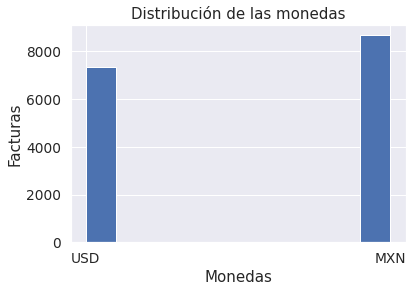

In [166]:
fig=plt.figure()
ax = fig.add_subplot()
ax.hist(df['Moneda'])
plt.title('Distribución de las monedas')
plt.xlabel('Monedas')
plt.ylabel('Facturas')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='ImporteFactura', ylabel='DepositoInicial'>

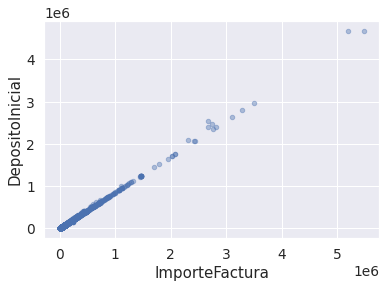

In [167]:
df.plot.scatter(x="ImporteFactura", y="DepositoInicial", alpha=0.4)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Dias', ylabel='Intereses'>

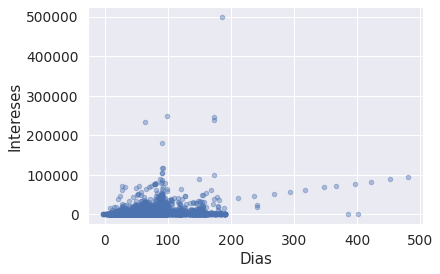

In [168]:
df.plot.scatter(x="Dias", y="Intereses", alpha=0.4)

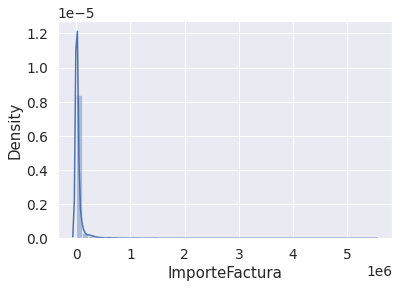

In [169]:
#histogram
sns.distplot(df['ImporteFactura']);

### Relationship with categorical features

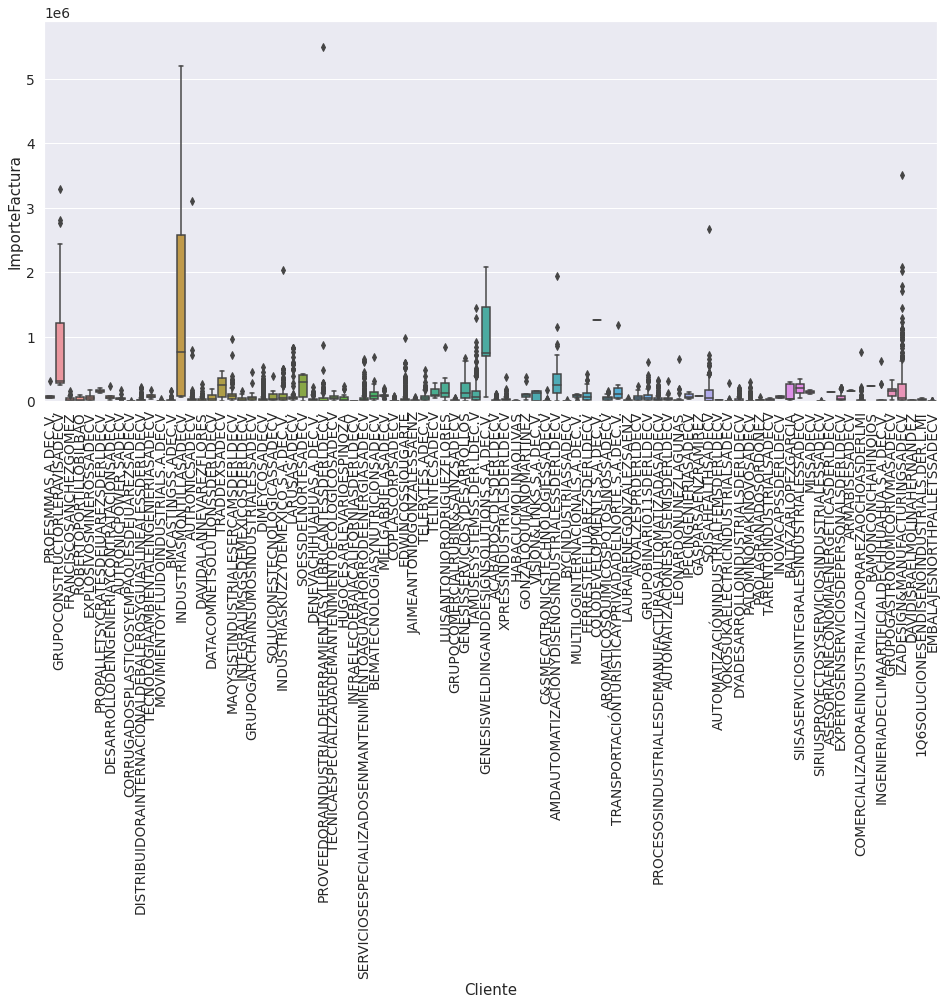

In [170]:
var = 'Cliente'
data = pd.concat([df['ImporteFactura'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 7))
fig = sns.boxplot(x=var, y="ImporteFactura", data=data)
fig.axis(ymin=0, ymax=5900000);
plt.xticks(rotation=90);


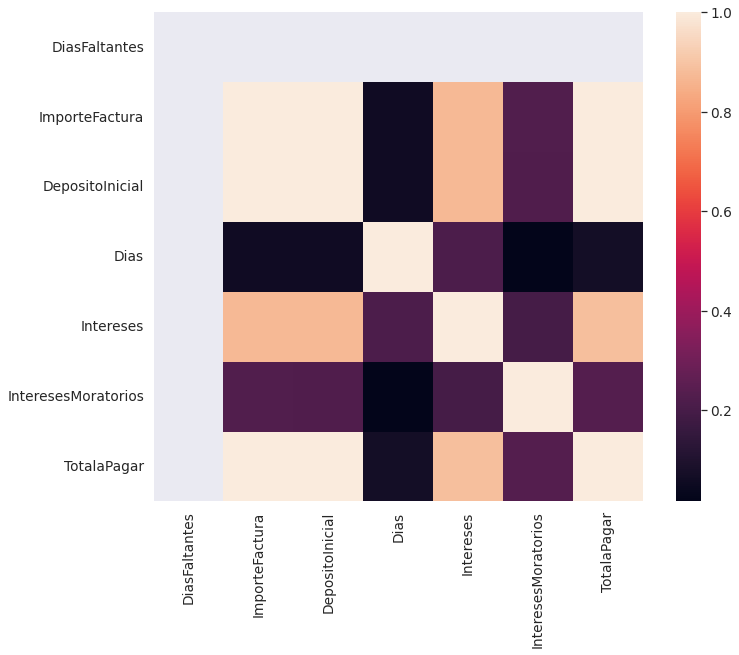

In [171]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

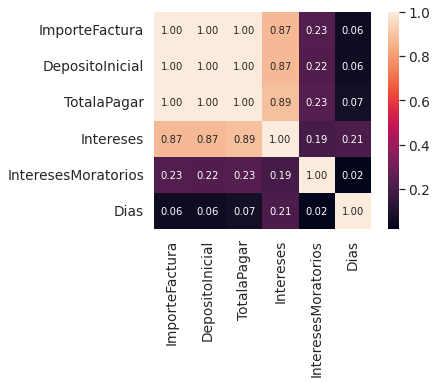

In [172]:
#ImporteFactura correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ImporteFactura')['ImporteFactura'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [179]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
RFCPagador,620,0.03869
Fecha,0,0.00000
DepositoInicial,0,0.00000
FechaPago,0,0.00000
TotalaPagar,0,0.00000
DiasVencido,0,0.00000
InteresesMoratorios,0,0.00000
Intereses,0,0.00000
Dias,0,0.00000
ImporteFactura,0,0.00000
